In [1]:
import pandas as pd
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

X, y = training_data.drop(columns=['label']).values, training_data['label'].values
X_test = testing_data

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras import layers, models
import matplotlib.pyplot as plt

X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

encoder = OneHotEncoder(sparse_output= False)
y = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {100 * test_acc:0.4f}%')


Epoch 1/10


/opt/anaconda3/envs/proj/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8591 - loss: 0.4272 - val_accuracy: 0.9776 - val_loss: 0.0697
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9794 - loss: 0.0648 - val_accuracy: 0.9893 - val_loss: 0.0360
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9874 - loss: 0.0406 - val_accuracy: 0.9781 - val_loss: 0.0716
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9895 - loss: 0.0332 - val_accuracy: 0.9895 - val_loss: 0.0347
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9912 - val_loss: 0.0280
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9936 - loss: 0.0188 - val_accuracy: 0.9900 - val_loss: 0.0347
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.9896 - val_loss: 0.0402
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9956 - loss: 0.01

In [3]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
print(predictions)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[8 1 9 ... 3 0 9]


In [4]:
def test(index):
    global X_test, predictions

    prediction = predictions[index]

    # print(predictions[index])

    print("Prediction: ", prediction)

    image = (X_test * 255)[index]
    image = image.reshape(28,28)

    plt.imshow(image, cmap = 'gray')
    plt.show()

Prediction:  8


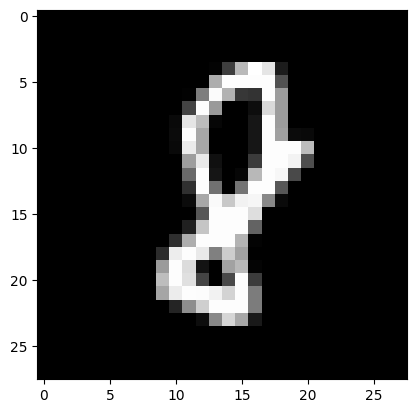

In [5]:
test(0)

Prediction:  2


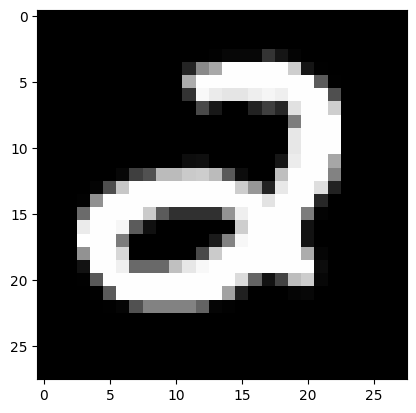

In [6]:
test(890)

Prediction:  9


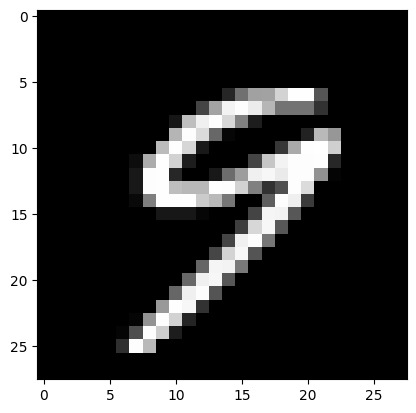

In [7]:
test(6900)